<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/executive/Hierarchical_CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings

#Data Loading

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')

In [77]:
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 41544 rows and 60 columns


In [78]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [80]:
df.isnull().sum()

,0
Total Household Income,0
Region,0
Total Food Expenditure,0
Main Source of Income,0
Agricultural Household indicator,0
Bread and Cereals Expenditure,0
Total Rice Expenditure,0
Meat Expenditure,0
Total Fish and marine products Expenditure,0
Fruit Expenditure,0


In [81]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


#Data Preprocessing

In [82]:
# Handle missing values
# Check percentage of missing values per column
missing_percentage = df.isnull().mean() * 100
print("Columns with missing values (%):")
display(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# Strategy: Fill numeric columns with median and categorical with mode
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

Columns with missing values (%):


,0
Household Head Occupation,18.139804
Household Head Class of Worker,18.139804
Toilet Facilities,3.803197


In [83]:
# Apply imputation
for column in numeric_features:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)

for column in categorical_features:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

print("Missing values after imputation:")
display(df.isnull().sum().sum())

Missing values after imputation:


<ipython-input-83-9f3c6bbc3ce8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


0

In [84]:
#Remove outliers from key income and expenditure variables

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [85]:
# Key financial variables that might have outliers
financial_vars = [
    'Total Household Income',
    'Total Food Expenditure',
    'Restaurant and hotels Expenditure',
    'Housing and water Expenditure',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Education Expenditure'
]

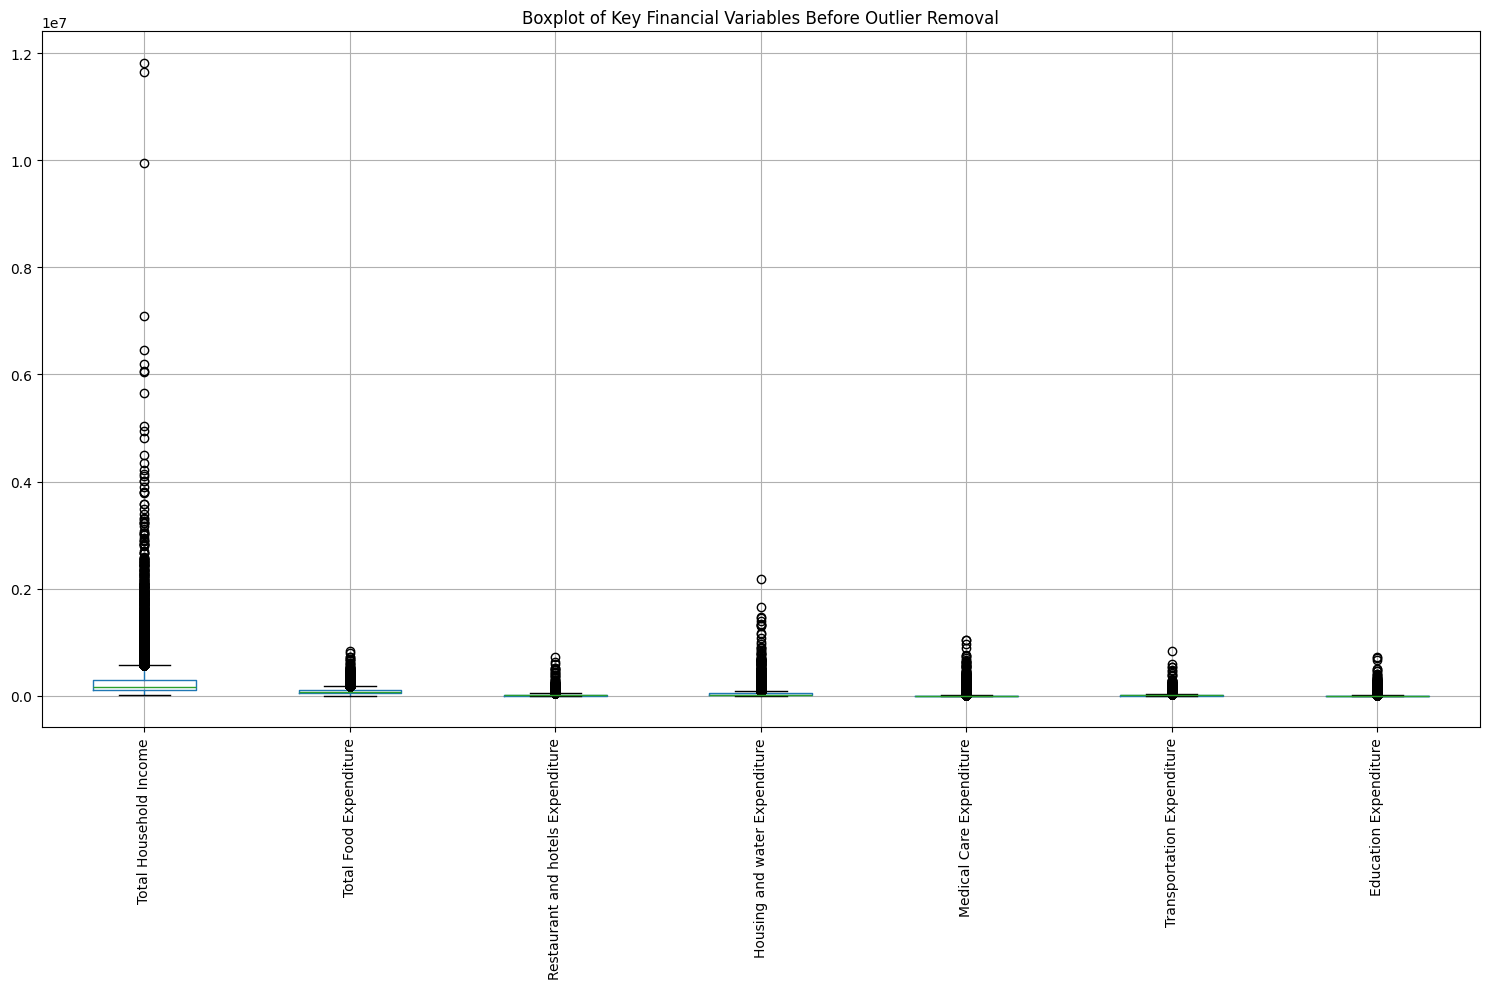

In [86]:
# Check outliers before removal
plt.figure(figsize=(15, 10))
df[financial_vars].boxplot()
plt.title('Boxplot of Key Financial Variables Before Outlier Removal')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [87]:
# Remove outliers from key variables
df_clean = df.copy()
for var in financial_vars:
    if var in df.columns:
        df_clean = remove_outliers(df_clean, var)

print(f"Data shape after outlier removal: {df_clean.shape}")
print(f"Removed {df.shape[0] - df_clean.shape[0]} rows as outliers")

Data shape after outlier removal: (30050, 60)
Removed 11494 rows as outliers


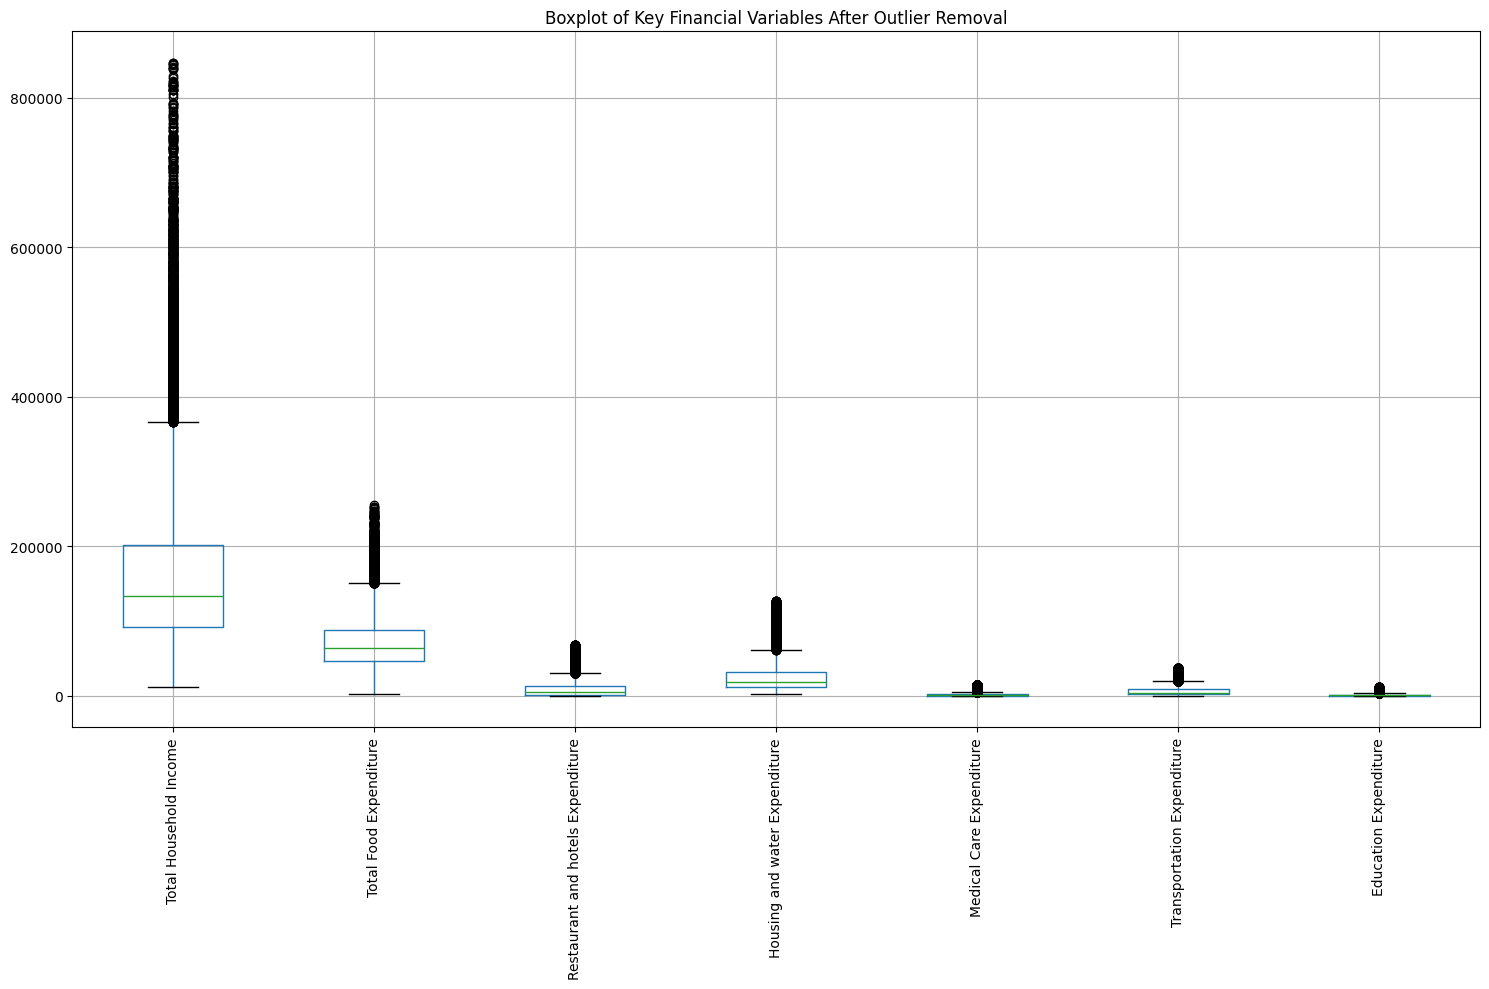

In [88]:
# Boxplot after outlier removal
plt.figure(figsize=(15, 10))
df_clean[financial_vars].boxplot()
plt.title('Boxplot of Key Financial Variables After Outlier Removal')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Feature Selection

In [89]:
# Feature selection for clustering
# Focus on variables relevant to our research question
# Income variables
income_vars = [col for col in df_clean.columns if 'Income' in col]

# Expenditure variables
expenditure_vars = [col for col in df_clean.columns if 'Expenditure' in col]

# Demographic variables
demographic_vars = [
    'Household Head Sex',
    'Household Head Age',
    'Household Head Highest Grade Completed',
    'Household Head Occupation',
    'Total Number of Family members',
    'Members with age less than 5 year old',
    'Members with age 5 - 17 years old',
    'Total number of family members employed'
]

# Housing and asset variables
housing_asset_vars = [
    'Type of Building/House',
    'House Floor Area',
    'House Age',
    'Number of bedrooms',
    'Tenure Status',
    'Number of Television',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Cellular phone',
    'Number of Personal Computer'
]

# Combine all selected features
selected_features = income_vars + expenditure_vars + demographic_vars + housing_asset_vars

# Filter only available columns (in case any of our selected features aren't in the dataset)
selected_features = [col for col in selected_features if col in df_clean.columns]

print("\nSelected features for clustering:")
print(selected_features)
print(f"Number of selected features: {len(selected_features)}")


Selected features for clustering:
['Total Household Income', 'Main Source of Income', 'Total Income from Entrepreneurial Acitivites', 'Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Household Head Sex', 'Household Head Age', 'Household Head Highest Grade Completed', 'Household Head Occupation', 'Total Number of Family members', 'Members with age less than 5 year old', 'Members with age 5 - 17 years old', 'Total number of family members employed', 'Type of Building/House', 

In [90]:
# Create a dataset with selected features
df_selected = df_clean[selected_features].copy()

In [91]:
# Check categorical vs numerical features in selected dataset
cat_features = df_selected.select_dtypes(include=['object']).columns.tolist()
num_features = df_selected.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical features: {len(cat_features)}")
print(f"Numerical features: {len(num_features)}")


Categorical features: 6
Numerical features: 35


#Feature Engineering and Transformation

In [92]:
# Create preprocessing pipeline
# For numerical features: impute and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical features: impute and one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer for applying transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

In [93]:
# Apply the preprocessing
X_transformed = preprocessor.fit_transform(df_selected)

print(f"Shape after transformation: {X_transformed.shape}")

Shape after transformation: (30050, 430)


#PCA

In [94]:
# Apply PCA
pca = PCA(n_components=0.90)  # Retain 90% of variance
X_pca = pca.fit_transform(X_transformed)

print(f"Shape after PCA: {X_pca.shape}")
print(f"Retained {X_pca.shape[1]} components explaining 90% of variance")

Shape after PCA: (30050, 30)
Retained 30 components explaining 90% of variance


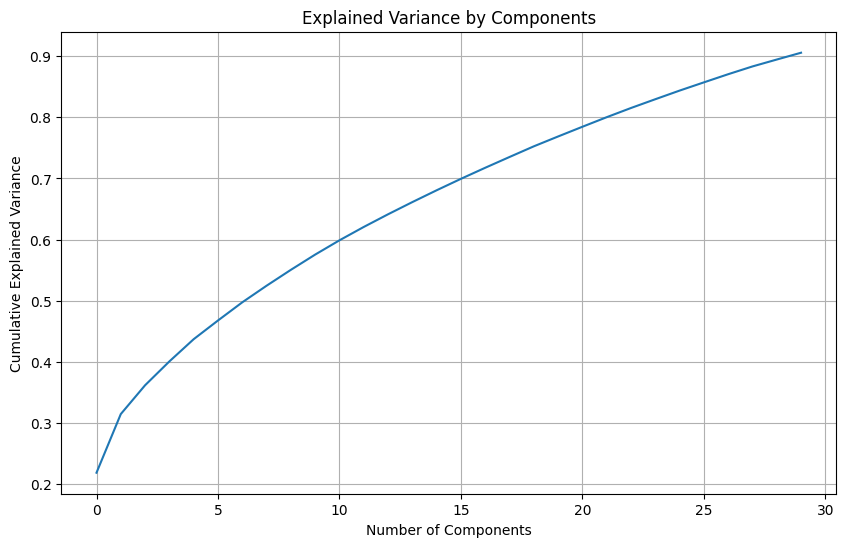

In [95]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

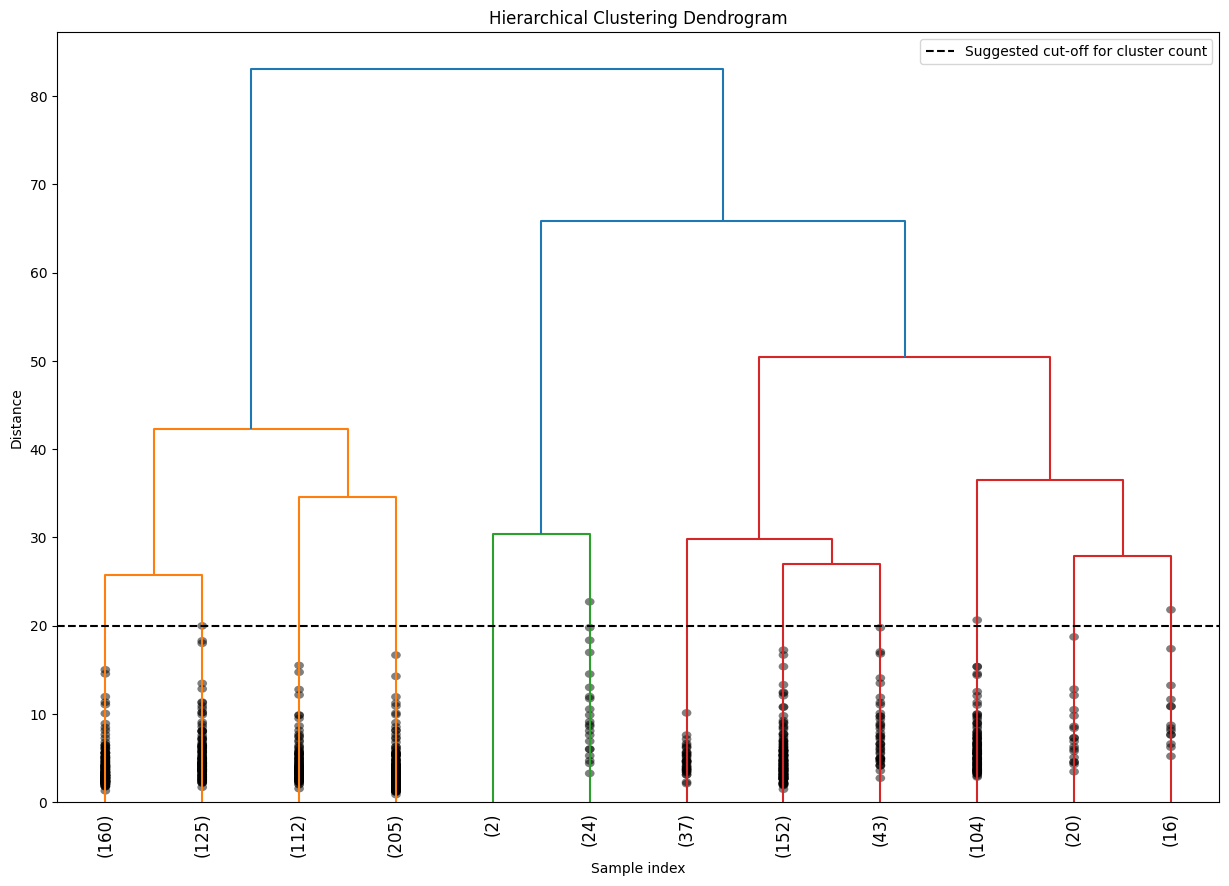

In [96]:
# Determine optimal number of clusters using dendrogram
# Take a sample if dataset is too large
sample_size = 1000 if X_pca.shape[0] > 1000 else X_pca.shape[0]
X_sample = X_pca[:sample_size]

# Compute linkage matrix
Z = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=12,  # Show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.axhline(y=20, c='k', linestyle='--', label='Suggested cut-off for cluster count')
plt.legend()
plt.show()

For n_clusters = 2, the silhouette score is 0.301
For n_clusters = 3, the silhouette score is 0.099
For n_clusters = 4, the silhouette score is 0.017
For n_clusters = 5, the silhouette score is 0.023
For n_clusters = 6, the silhouette score is 0.027
For n_clusters = 7, the silhouette score is 0.011
For n_clusters = 8, the silhouette score is -0.003
For n_clusters = 9, the silhouette score is -0.001
For n_clusters = 10, the silhouette score is 0.003


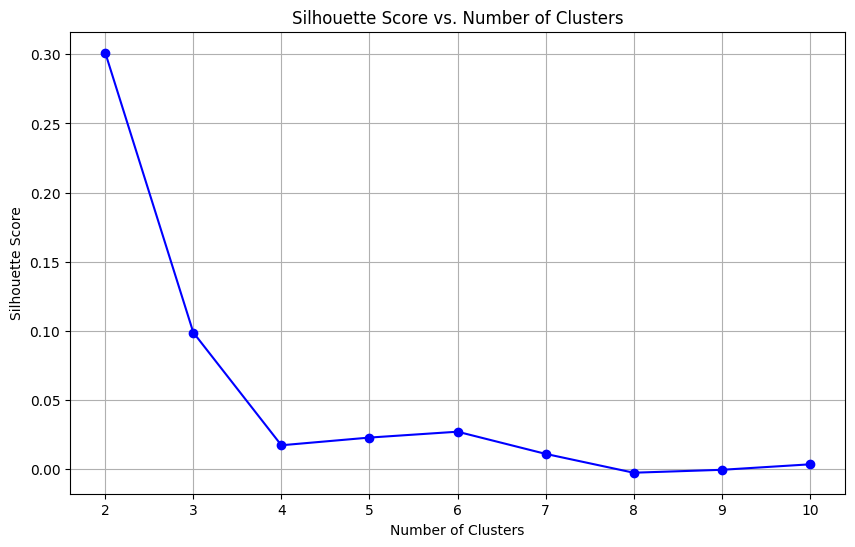

In [97]:
# Range of clusters to test
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    # Initialize and fit Agglomerative Clustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X_pca)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [98]:
# Choose the optimal number of clusters based on silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_clusters}")


Optimal number of clusters based on silhouette score: 2


#Hierarchical Clustering

In [99]:
# Initialize and fit Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
df_clean['Cluster'] = hierarchical.fit_predict(X_pca)


Cluster Distribution:


,count
Cluster,
0,25524
1,4526


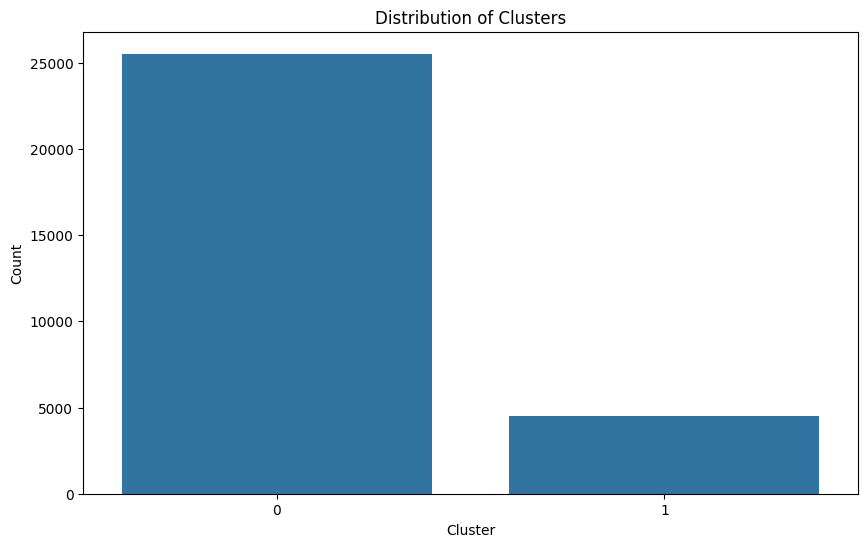

In [100]:
# Display cluster distribution
print("\nCluster Distribution:")
cluster_counts = df_clean['Cluster'].value_counts().sort_index()
display(cluster_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_clean)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

#Cluster Analysis

In [101]:
# Function to analyze clusters
def analyze_clusters(df, cluster_col, features_to_analyze):
    """
    Analyze clusters by computing mean values of selected features per cluster.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    cluster_col : str
        The name of the column containing cluster assignments
    features_to_analyze : list
        List of features to analyze

    Returns:
    --------
    pandas.DataFrame
        Dataframe with mean values per cluster
    """
    # Filter features that exist in the dataframe
    available_features = [f for f in features_to_analyze if f in df.columns]

    # Compute cluster means for each feature
    cluster_means = df.groupby(cluster_col)[available_features].mean()

    return cluster_means

In [104]:
# Convert all relevant features to numeric, coercing errors to NaN
financial_vars = [
    'Total Household Income',
    'Total Food Expenditure',
    'Restaurant and hotels Expenditure',
    'Housing and water Expenditure',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Education Expenditure'
]
income_vars = [col for col in df_clean.columns if 'Income' in col]
expenditure_vars = [col for col in df_clean.columns if 'Expenditure' in col]
demographic_vars = [
    'Household Head Sex',
    'Household Head Age',
    'Household Head Highest Grade Completed',
    'Household Head Occupation',
    'Total Number of Family members',
    'Members with age less than 5 year old',
    'Members with age 5 - 17 years old',
    'Total number of family members employed'
]
housing_asset_vars = [
    'Type of Building/House',
    'House Floor Area',
    'House Age',
    'Number of bedrooms',
    'Tenure Status',
    'Number of Television',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Cellular phone',
    'Number of Personal Computer'
]
cols_to_convert = income_vars + expenditure_vars + demographic_vars + housing_asset_vars
for col in cols_to_convert:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Analyze income patterns
income_analysis = analyze_clusters(df_clean, 'Cluster', income_vars)

print("\nIncome Analysis by Cluster:")
display(income_analysis)


Income Analysis by Cluster:


,Total Household Income,Main Source of Income,Total Income from Entrepreneurial Acitivites
Cluster,,,
0,135581.165452,NaN,37225.319190
1,323968.004198,NaN,51068.863677


<Figure size 1200x600 with 0 Axes>

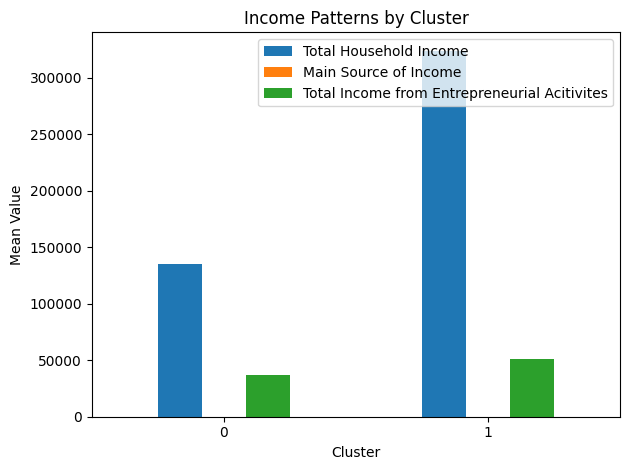

In [105]:
# Visualize income patterns
plt.figure(figsize=(12, 6))
income_analysis.plot(kind='bar')
plt.title('Income Patterns by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [106]:
# Analyze expenditure patterns
expenditure_analysis = analyze_clusters(df_clean, 'Cluster', expenditure_vars)
print("\nExpenditure Analysis by Cluster:")
display(expenditure_analysis)


Expenditure Analysis by Cluster:


,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure
Cluster,,,,,,,,,,,,,,,,,,
0,62739.141475,22768.948676,16922.889986,6379.728491,8720.474690,1749.560453,4231.576281,7388.005759,940.377566,2118.406833,2576.707648,20242.186883,1640.440017,5306.537377,1319.511283,1219.548033,5979.387635,2417.062177
1,111063.961114,28080.649801,19762.346664,16973.794300,12824.028944,3406.822139,5900.265577,21274.244366,1291.367654,3123.832965,7231.417366,51416.449845,3530.187362,14409.208131,6174.277066,2156.750552,19884.029165,8872.868537


<Figure size 1500x800 with 0 Axes>

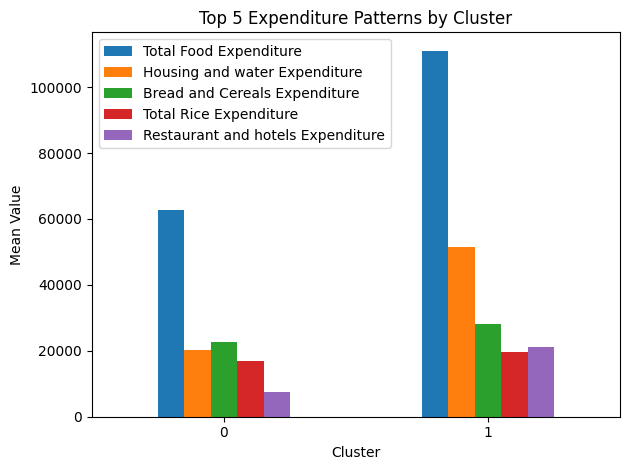

In [107]:
# Visualize expenditure patterns (Top 5 expenditures)
top_expenditures = expenditure_analysis.mean().sort_values(ascending=False).head(5).index.tolist()
plt.figure(figsize=(15, 8))
expenditure_analysis[top_expenditures].plot(kind='bar')
plt.title('Top 5 Expenditure Patterns by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [108]:
# Analyze demographic patterns
demographic_analysis = analyze_clusters(df_clean, 'Cluster', demographic_vars)
print("\nDemographic Analysis by Cluster:")
display(demographic_analysis)


Demographic Analysis by Cluster:


,Household Head Sex,Household Head Age,Household Head Highest Grade Completed,Household Head Occupation,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed
Cluster,,,,,,,,
0,NaN,50.493183,NaN,NaN,4.432769,0.437588,1.438920,1.142611
1,NaN,51.183606,NaN,NaN,4.859479,0.425983,1.252541,1.554132


In [109]:
# Analyze housing and asset patterns
housing_asset_analysis = analyze_clusters(df_clean, 'Cluster', housing_asset_vars)
print("\nHousing and Asset Analysis by Cluster:")
display(housing_asset_analysis)


Housing and Asset Analysis by Cluster:


,Type of Building/House,House Floor Area,House Age,Number of bedrooms,Tenure Status,Number of Television,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Cellular phone,Number of Personal Computer
Cluster,,,,,,,,,,,,
0,NaN,43.859426,18.640730,1.493927,NaN,0.644060,0.181751,0.123609,0.000470,0.000039,1.289884,0.052696
1,NaN,63.610252,22.024967,2.063190,NaN,1.146045,0.719841,0.686036,0.260495,0.116217,2.783473,0.574901


In [110]:
# Calculate total expenditure if not present
if 'Total Expenditure' not in df_clean.columns:
    # Define expenditure columns (adjust if needed)
    expenditure_cols = [col for col in df_clean.columns if 'Expenditure' in col]
    df_clean['Total Expenditure'] = df_clean[expenditure_cols].sum(axis=1)

# Calculate income-to-expenditure ratio
df_clean['Income_to_Expenditure_Ratio'] = df_clean['Total Household Income'] / df_clean['Total Expenditure']

# Handle infinity values (if expenditure is 0)
df_clean['Income_to_Expenditure_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean['Income_to_Expenditure_Ratio'].fillna(df_clean['Income_to_Expenditure_Ratio'].median(), inplace=True)

<ipython-input-110-4703183a2685>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Income_to_Expenditure_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-110-4703183a2685>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [111]:
# Analyze income-to-expenditure ratio by cluster
ratio_analysis = df_clean.groupby('Cluster')['Income_to_Expenditure_Ratio'].mean().sort_values()
print("\nIncome-to-Expenditure Ratio Analysis by Cluster:")
display(ratio_analysis)


Income-to-Expenditure Ratio Analysis by Cluster:


,Income_to_Expenditure_Ratio
Cluster,
0,0.781528
1,0.974356


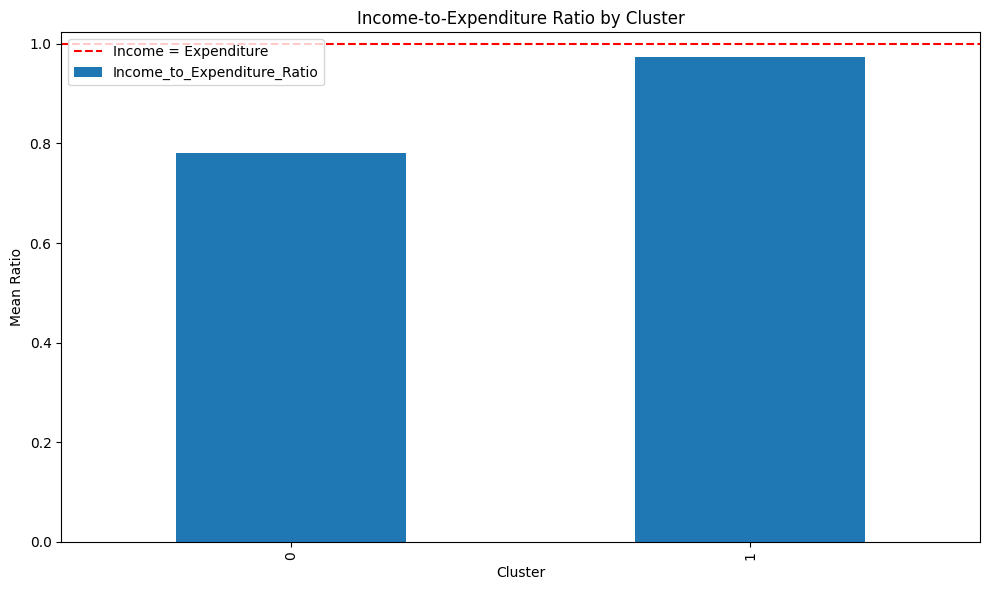

In [112]:
plt.figure(figsize=(10, 6))
ratio_analysis.plot(kind='bar')
plt.title('Income-to-Expenditure Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Ratio')
plt.axhline(y=1, color='r', linestyle='--', label='Income = Expenditure')
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
# Calculate percentage of each expenditure category
expenditure_pct_cols = []
for col in expenditure_vars:
    if col in df_clean.columns and col != 'Total Expenditure':
        new_col = f"{col}_pct"
        df_clean[new_col] = df_clean[col] / df_clean['Total Expenditure'] * 100
        expenditure_pct_cols.append(new_col)

# Analyze expenditure percentages by cluster
expenditure_pct_analysis = df_clean.groupby('Cluster')[expenditure_pct_cols].mean()
print("\nExpenditure Percentage Analysis by Cluster:")
display(expenditure_pct_analysis)


Expenditure Percentage Analysis by Cluster:


,Total Food Expenditure_pct,Bread and Cereals Expenditure_pct,Total Rice Expenditure_pct,Meat Expenditure_pct,Total Fish and marine products Expenditure_pct,Fruit Expenditure_pct,Vegetables Expenditure_pct,Restaurant and hotels Expenditure_pct,Alcoholic Beverages Expenditure_pct,Tobacco Expenditure_pct,"Clothing, Footwear and Other Wear Expenditure_pct",Housing and water Expenditure_pct,Medical Care Expenditure_pct,Transportation Expenditure_pct,Communication Expenditure_pct,Education Expenditure_pct,Miscellaneous Goods and Services Expenditure_pct,Special Occasions Expenditure_pct
Cluster,,,,,,,,,,,,,,,,,,
0,35.986687,13.402170,9.680288,3.424906,5.093498,1.055765,2.587150,3.853723,0.538376,1.224203,1.472343,11.84675,0.981762,2.913346,0.686071,0.648937,3.325588,1.278437
1,32.645858,8.397584,5.943331,4.907980,3.773858,1.012740,1.775099,6.136080,0.381176,0.937709,2.133952,15.70151,1.083029,4.313041,1.809782,0.645812,5.838442,2.563018


<Figure size 1500x800 with 0 Axes>

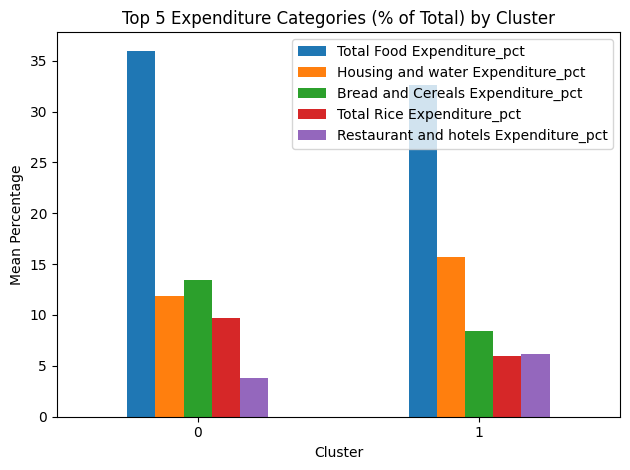

In [114]:
# Visualize top 5 expenditure percentages
top_pct_expenditures = expenditure_pct_analysis.mean().sort_values(ascending=False).head(5).index.tolist()
plt.figure(figsize=(15, 8))
expenditure_pct_analysis[top_pct_expenditures].plot(kind='bar')
plt.title('Top 5 Expenditure Categories (% of Total) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Percentage')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [115]:
# Rank clusters by income
income_rank = income_analysis['Total Household Income'].rank(ascending=False).astype(int)
print("Clusters ranked by income (1 = highest income):")
display(income_rank)

Clusters ranked by income (1 = highest income):


,Total Household Income
Cluster,
0,2
1,1


In [116]:
# Create a comprehensive profile for each cluster
cluster_profiles = pd.DataFrame(index=range(optimal_clusters))
cluster_profiles['Size'] = cluster_counts.values
cluster_profiles['Income_Rank'] = income_rank.values
cluster_profiles['Avg_Income'] = income_analysis['Total Household Income'].values
cluster_profiles['Avg_Expenditure'] = df_clean.groupby('Cluster')['Total Expenditure'].mean().values
cluster_profiles['Income_Expenditure_Ratio'] = ratio_analysis.values
cluster_profiles['Avg_Family_Size'] = demographic_analysis['Total Number of Family members'].values if 'Total Number of Family members' in demographic_analysis.columns else np.nan
cluster_profiles['Employed_Members'] = demographic_analysis['Total number of family members employed'].values if 'Total number of family members employed' in demographic_analysis.columns else np.nan

In [117]:
# Assign socioeconomic class based on income rank
# This is a simplified approach - in reality, you might want a more nuanced classification
class_labels = {
    1: 'Upper Class',
    2: 'Upper Middle Class',
    3: 'Middle Class',
    4: 'Lower Middle Class',
    5: 'Lower Class'
}

# Ensure we only use available ranks
available_ranks = range(1, optimal_clusters + 1)
class_labels = {k: v for k, v in class_labels.items() if k in available_ranks}

In [118]:
# Assign class labels
cluster_profiles['Socioeconomic_Class'] = cluster_profiles['Income_Rank'].map(class_labels)

print("\nCluster Socioeconomic Profiles:")
display(cluster_profiles)


Cluster Socioeconomic Profiles:


,Size,Income_Rank,Avg_Income,Avg_Expenditure,Income_Expenditure_Ratio,Avg_Family_Size,Employed_Members,Socioeconomic_Class
0,25524,2,135581.165452,174660.491263,0.781528,4.432769,1.142611,Upper Middle Class
1,4526,1,323968.004198,337376.501547,0.974356,4.859479,1.554132,Upper Class


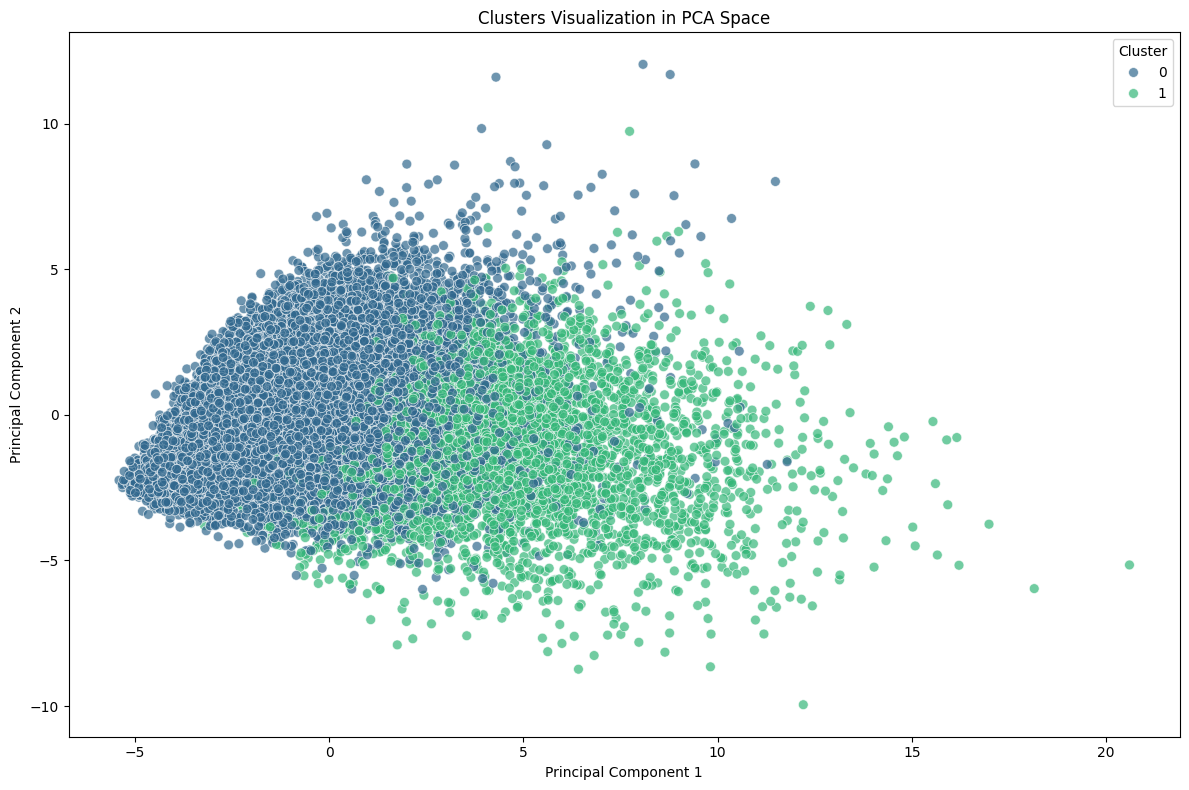

In [119]:
# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_clean['Cluster'].values

# Plot clusters in PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50, alpha=0.7)
plt.title('Clusters Visualization in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

#Summary and Conclusion

In [120]:
print("\nSummary and Conclusion:")
print(f"- Performed hierarchical clustering analysis on Filipino household data")
print(f"- Identified {optimal_clusters} distinct socioeconomic clusters")
print(f"- Achieved a silhouette score of {max(silhouette_scores):.3f}")
print(f"- Found significant disparities in income and expenditure patterns across clusters")


Summary and Conclusion:
- Performed hierarchical clustering analysis on Filipino household data
- Identified 2 distinct socioeconomic clusters
- Achieved a silhouette score of 0.301
- Found significant disparities in income and expenditure patterns across clusters


In [121]:
# Key insights per cluster
print("\nKey insights:")
for i in range(optimal_clusters):
    cluster_idx = i
    print(f"\nCluster {cluster_idx} ({cluster_profiles.loc[cluster_idx, 'Socioeconomic_Class']}):")
    print(f"- Population: {cluster_profiles.loc[cluster_idx, 'Size']} households")
    print(f"- Average Income: {cluster_profiles.loc[cluster_idx, 'Avg_Income']:.2f}")
    print(f"- Average Expenditure: {cluster_profiles.loc[cluster_idx, 'Avg_Expenditure']:.2f}")
    print(f"- Income to Expenditure Ratio: {cluster_profiles.loc[cluster_idx, 'Income_Expenditure_Ratio']:.2f}")

    # Top 3 expenditure categories for this cluster
    if len(expenditure_vars) > 0:
        top_expenditures_cluster = expenditure_analysis.loc[cluster_idx].sort_values(ascending=False).head(3)
        print(f"- Top 3 expenditure categories:")
        for exp, val in top_expenditures_cluster.items():
            print(f"  * {exp}: {val:.2f}")

print("\nPotential Policy Implications:")
print("1. Targeted financial assistance programs for lower-income clusters")
print("2. Educational initiatives focused on financial literacy and budgeting")
print("3. Health and nutrition interventions for clusters with high food insecurity")
print("4. Housing subsidies for clusters with poor housing conditions")
print("5. Job creation and skills development programs in regions with higher unemployment")


Key insights:

Cluster 0 (Upper Middle Class):
- Population: 25524 households
- Average Income: 135581.17
- Average Expenditure: 174660.49
- Income to Expenditure Ratio: 0.78
- Top 3 expenditure categories:
  * Total Food Expenditure: 62739.14
  * Bread and Cereals Expenditure: 22768.95
  * Housing and water Expenditure: 20242.19

Cluster 1 (Upper Class):
- Population: 4526 households
- Average Income: 323968.00
- Average Expenditure: 337376.50
- Income to Expenditure Ratio: 0.97
- Top 3 expenditure categories:
  * Total Food Expenditure: 111063.96
  * Housing and water Expenditure: 51416.45
  * Bread and Cereals Expenditure: 28080.65

Potential Policy Implications:
1. Targeted financial assistance programs for lower-income clusters
2. Educational initiatives focused on financial literacy and budgeting
3. Health and nutrition interventions for clusters with high food insecurity
4. Housing subsidies for clusters with poor housing conditions
5. Job creation and skills development progra